In [2]:
from typing import List

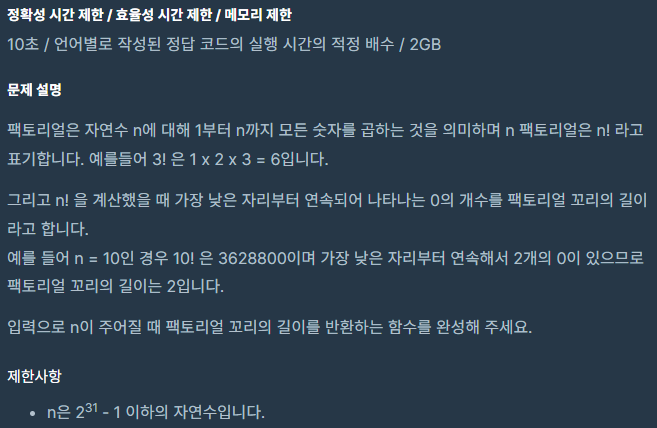

In [ ]:
n = int(input())
def five_count(n):
    cnt = 0
    while n != 0:
        n //= 5
        cnt += n
    return cnt
    
print(five_count(n))

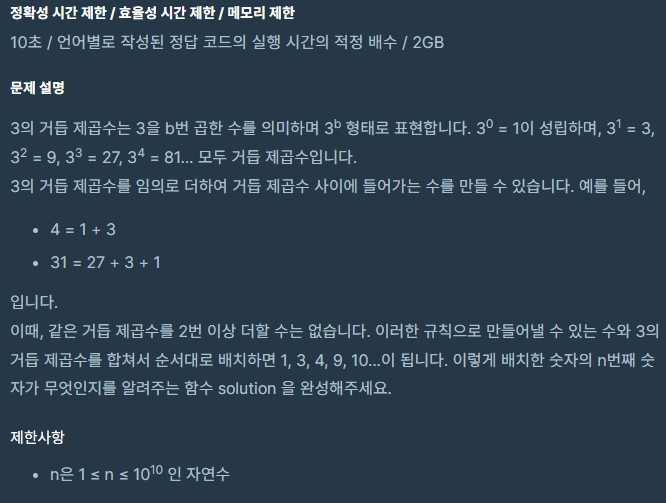

In [ ]:
K = bin(int(input()))[2:] #2진법으로 변환하여 풀이
answer = 0

for i in range(len(K)):
    if int(K[i]) == 1: #1인 부분만 3**n을 더해줌
        answer += 3 ** (len(K)-i-1)


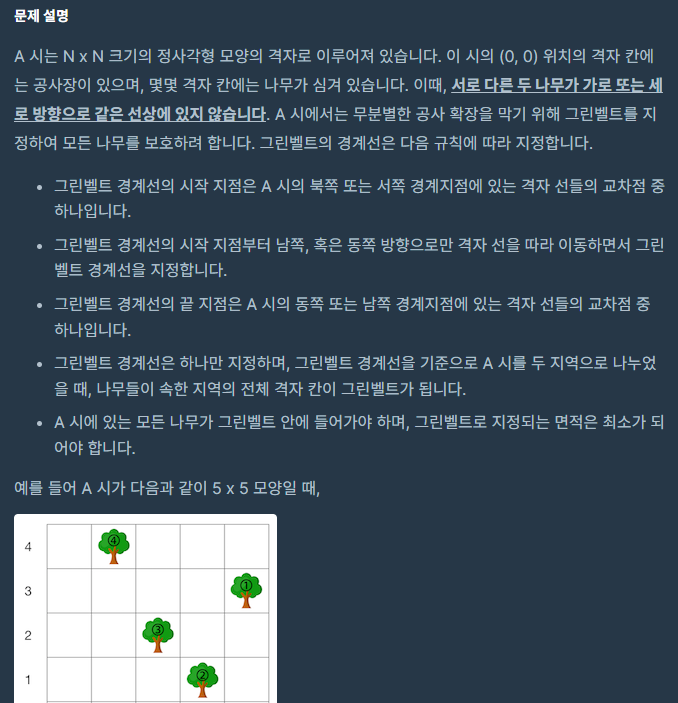

In [76]:
graph = [[0 for _ in range(4)] for _ in range(5)]

graph

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

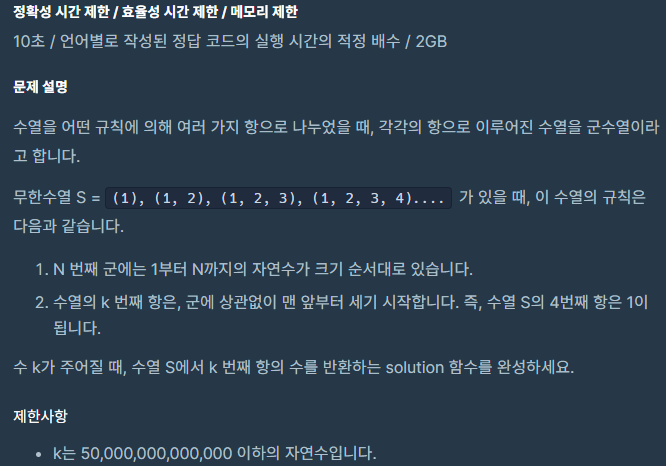

In [71]:
def solution(k):
    answer = 1
    seq = 1
    while seq < k:
        if k  == 1:
            break
        else:
            answer += 1
            # Skipping after 군
            seq += answer
    return answer-(seq-k)

In [72]:
k = 4
solution(k)

1

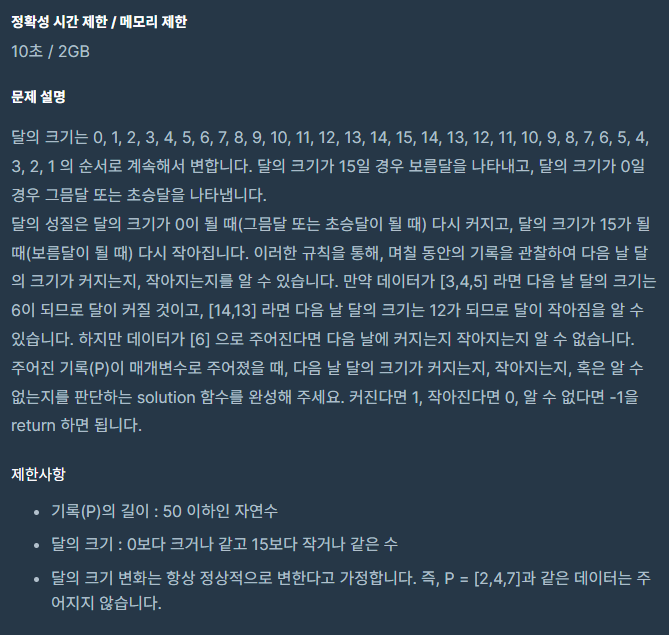

In [58]:
def solution(p):
    answer = -1
    # Base case
    if len(p) <= 1:
        return -1
    # Determine whether the size is increasing or not
    end = len(p)
    if p[end-1] < p[end-2]:
        answer = 0 
    else:
        answer = 1
    return answer

In [59]:
p = [3,4,5]
solution(p)

1

In [60]:
p = [14,13]
solution(p)

0

In [61]:
p = [6]
solution(p)

1

# 1971. Find if Path Exists in Graph

In [3]:
# BFS
from collections import defaultdict, deque
def validPath(n: int, edges: List[List[int]], source: int, destination: int) -> bool:
    # adj_list = {i:[] for i in range(n)}
    graph = defaultdict(list)
    for v1,v2 in edges:
        graph[v1].append(v2)
        graph[v2].append(v1)
        
    # Queue for BFS -> Should start from source (=root)
    queue = deque()
    queue.append(source)
    visit = [0]*n
    while queue:
        curr = queue.popleft()
        if curr == destination:
            return True
        # If this node has been visited -> No need to 
        if visit[curr]:
            continue
        # Mark the node as visited
        visit[curr] = True
        # For all adjacent nodes
        for v in graph[curr]:
            if v == destination:
                return True
            elif not visit[v]:
                queue.append(v)
    return False     

In [51]:
# Not a vaild answer
from collections import defaultdict
def build_graph(edge):
    graph = defaultdict(list)
    for i in range(len(edge)):
        graph[edge[i][0]].append(edge[i][1])
        graph[edge[i][1]].append(edge[i][0])
    return graph

def validPath(n: int, edges: List[List[int]], source: int, destination: int) -> bool:
    graph = build_graph(edges)
    # Base case
    if source == destination:
        return True
    if destination in graph[source]:
        return True
    for intermediate in graph[source]:
        if destination in graph[intermediate]:
            return True
    return False
    

In [54]:
# Adjacency matrix
def validPath(n: int, edges: List[List[int]], source: int, destination: int) -> bool:
    graph = [[] for _ in range(n)]
    # Matrix construction
    for edge in edges:
        graph[edge[0]].append(edge[1])
        graph[edge[1]].append(edge[0])
    # dfs
    visited = set()
    def dfs(node):
        # Base Case
        if node == destination:
            return True
        visited.add(node)
        for w in graph[node]:
            if w not in visited:
                if dfs(w):
                    return True
        return False
    return dfs(source)

In [5]:
from typing import List

# DFS
def validPath(n: int, graph: List[List[int]], source: int, destination: int)-> List[List[int]]:
    paths, targets = [[source]], [] 
    while paths:
        # Go over all paths
        path = paths.pop(0) 
        # Latest node as curr edge
        edges = graph[path[-1]]
        if not edges:
            continue
        for edge in edges:
            # when we reach destination
            if edge==destination:
                # complete path
                targets.append(path+[edge])
            else:
                # expand the possible path
                paths = [path+[edge]] + paths
    return targets

In [6]:
n = 3
edges = [[0,1],[1,2],[2,0]]
source = 0
destination = 2
validPath(n, edges, source, destination)

KeyboardInterrupt: 

In [8]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
source = 0
destination = 5
validPath(n, edges, source, destination)

queue" deque([0])
visit" [0, 0, 0, 0, 0, 0]
queue" deque([1, 2])
visit" [True, 0, 0, 0, 0, 0]
queue" deque([2])
visit" [True, True, 0, 0, 0, 0]


False

In [9]:
n = 10
edges = [[4,3],[1,4],[4,8],[1,7],[6,4],[4,2],[7,4],[4,0],[0,9],[5,4]]
source = 5
destination = 9
validPath(n, edges, source, destination)

queue" deque([5])
visit" [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
queue" deque([4])
visit" [0, 0, 0, 0, 0, True, 0, 0, 0, 0]
queue" deque([3, 1, 8, 6, 2, 7, 0])
visit" [0, 0, 0, 0, True, True, 0, 0, 0, 0]
queue" deque([1, 8, 6, 2, 7, 0])
visit" [0, 0, 0, True, True, True, 0, 0, 0, 0]
queue" deque([8, 6, 2, 7, 0, 7])
visit" [0, True, 0, True, True, True, 0, 0, 0, 0]
queue" deque([6, 2, 7, 0, 7])
visit" [0, True, 0, True, True, True, 0, 0, True, 0]
queue" deque([2, 7, 0, 7])
visit" [0, True, 0, True, True, True, True, 0, True, 0]
queue" deque([7, 0, 7])
visit" [0, True, True, True, True, True, True, 0, True, 0]
queue" deque([0, 7])
visit" [0, True, True, True, True, True, True, True, True, 0]


True

# Make a normal distributed Dice using Coin

In [4]:
class Coin:
    """Do not fix this function"""
    def toss():
        import random
        return random.randint(0, 1)

class Dice:    
    @staticmethod
    def toss():
        # Don't use python random library,
        # Only use Coin.toss()
        number = 0
        for i in range(6):
          number += Coin.toss()
        return number

In [7]:
number = 0
count = 0
for i in range(5):
    number += Coin.toss()
    count += 1
print(number)
print(count)

4
5


# 1312. Minimum_Steps_To_Make_String_Palindrome

In [11]:
def minInsertions(s: str) -> int:
    dp = [[0 for _ in range(len(s))]for _ in range(len(s))]
    for left in range(len(s) - 1, -1, -1): # 

            dp[left][left] = 1

            for right in range(left + 1, len(s)):

                if s[left] == s[right]:
                    dp[left][right] = 2 + dp[left + 1][right - 1]
                else:
                    dp[left][right] = max(dp[left + 1][right], dp[left][right - 1])

    return len(s) - dp[0][len(s) - 1]

In [14]:
s = "zzazz"
minInsertions(s) #0

0

In [13]:
s = "mbadm"
minInsertions(s)

2

# 209. Minimum Size Subarray Sum

In [61]:
# One pointer
def minSubArrayLen(target: int, nums: List[int])->int:
    left = 0
    num_sum = 0
    length = 10000000

    for i in range(len(nums)):
        num_sum += nums[i]
        while num_sum >= target:
            length = min(length, (i-left+1))
            num_sum -= nums[left]
            left += 1

    return 0 if length == 10000000 else length

In [89]:
def minSubArrayLen(target: int, nums: List[int])->int:
    right, left = 0, 0
    num_sum = nums[right] # first element
    length = 10000000 #minimum length

    while (right<=left) and (left<len(nums)):
        if nums[left] >= target:
            return 1
        if num_sum >= target:
            length = min(length, left-right+1)
            num_sum -= nums[right]
            right += 1
        else:
            left += 1
            if left<len(nums):
                num_sum += nums[left] 
            

    return 0 if length == 10000000 else length

In [90]:
target = 7
nums = [2,3,1,2,4,3]
minSubArrayLen(target, nums) # 2

2

In [91]:
target = 4
nums = [1,4,4]
minSubArrayLen(target, nums) # 1

1

# 151. Reverse Words in a String

In [19]:
def reverseWords(s: str) -> str:
    list_words = s.split()
    str = ""
    str = " ".join(list_words[::-1])
    return str

In [20]:
s = "the sky is blue"
reverseWords(s) # "blue is sky the"

'blue is sky the'

# Kakao: Q4
### Give a coins and cards, you will play a game. 

### Kakao: Q5 -> find the expected value when number of vertices and tops are given. (geometrical question)

In [315]:
coin = 4
cards = [3, 6, 7, 2, 1, 10, 5, 9, 8, 12, 11, 4] # soln: 5
n = len(cards)

In [317]:
coin = 2
cards = [5, 8, 1, 2, 9, 4, 12, 11, 3, 10, 6, 7]
n = len(cards)

In [318]:
import itertools

answer = 1 # number of rounds
# Settings
n = len(cards) 
my_cards, my_coins = cards[:n//3], coin//3
cards = cards[n//3:]

# Game Starts
while cards and my_coins:
    # Pop two cards from stack
    card_1, card_2 = cards[:2][0], cards[:2][1] 
    cards = cards[2:]
    Flag = False
    
    # In order to go for next round while using my cards
    for pair in combinations(my_cards, 2):
        # If my card can make sum of (n+1)
        if sum(pair) == n+1:
            my_cards.remove(pair[0])
            my_cards.remove(pair[1])
            answer += 1
            Flag = True
            
    # if non of pairs can make sum of (n+1)
    if Flag == False:
        if card_1>max(my_cards) and card_2 > max(my_cards):
            
        for card in my_cards:
            # If one of card can make sum of (n+1)
            if (card_1 + card == (n+1)) or (card_2 + card == (n+1)):
                my_coins -= 1
                my_cards.remove(card)
                answer += 1
            # If two cards can make sum of (n+1)
            if (card_1 + card_2 == (n+1)):
                answer += 1
                my_coins -= 2
        

# Q3
### Give a list of dices (a list of 6 numbers), find the combination of dices that yields maximal possibility of wins. 

In [291]:
from itertools import combinations, product
dice = [1,2,3,4,5,6]
com = combinations(dice, 1)
print(list(com))



[(1,), (2,), (3,), (4,), (5,), (6,)]


In [304]:
answer

0

# Q2
### Give a list of edges, find the number of eight cycle, donut cycle, and straight with the index of vertice that starts the graph

In [281]:
def solution(edges):
    answer = []
    adj_mat = {}
    # donut: n edges, n vertices / eight: 2n+1 vertices, 2n+2 edges / straigth: n vertices, n-1 edges
    donut, straight, eight = 0, 0, 0
    answer = [vertice, donut, straight, eight]

    # Adj Matrix Construction - row: out, col: in
    for v,w in edges:
        if v not in adj_mat.keys():
            adj_mat[v] = [w]
        else:
            adj_mat[v].append(w)

    # dfs
    def dfs(visited, graph, vertice, answer):
        if vertice not in visited:
            visited.append(vertice)

            # not outgoing edges anymore
            if vertice not in graph.keys():
                graph[vertice] = []
                # add number of straight
                answer[2] += 1
            
            # Go though all the neighbors
            for neighbor in graph[vertice]:
                if neighbor in visited:
                    answer[1] += 1
                dfs(visited, graph, neighbor)

    return answer

# Kakao: Q1

In [162]:
def solution(friends, gifts):
    answer = 0
    n_ppl = len(friends)
    # Setting
    # DP Table (row: gift, column: gifted)
    dp = [[0 for _ in range(n_ppl)] for _ in range(n_ppl)]
    for item in gifts:
        A, B = item.split()
        row, col = friends.index(A), friends.index(B)
        dp[row][col] += 1
    # Gift Index
    idx, gifts = [0] * n_ppl, [0] * n_ppl
    for i in range(n_ppl):
        # gift index = (sum of elements in a row) - (sum of elements in a column)
        idx[i] = sum(dp[i]) - sum(row[i] for row in dp)

    # For processing
    for i in range(n_ppl):
        for j in range(i+1,n_ppl):
            print(gifts)
            # if no records for gifts, or equally gifted
            if dp[i][j] == 0 or dp[j][i] == 0 or dp[i][j] == dp[j][i]:
                # for equal gift index
                if idx[i] == idx[j]:
                    continue
                # other cases
                if idx[i] > idx[j]:
                    gifts[i] += 1
                else:
                    gifts[j] += 1
            else:
                if dp[i][j] > dp[j][i]:
                    gifts[i] += 1
                else:
                    gifts[j] += 1

        
    return gifts

In [163]:
friends = ["muzi", "ryan", "frodo", "neo"]
gifts = ["muzi frodo", "muzi frodo", "ryan muzi", "ryan muzi", "ryan muzi", "frodo muzi", "frodo ryan", "neo muzi"]
# result: 2
solution(friends, gifts)

[0, 0, 0, 0]
[0, 1, 0, 0]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 2, 0, 1]
[1, 3, 0, 1]


[1, 3, 0, 2]

# Kakao: Recommendation of new ID

In [98]:
def solution(new_id):
    answer = ''
    for char in new_id:
        # Step 1: upper to lower
        if char.isupper():
            answer += char.lower()
            continue
        # Step 2: remove prohibited characters
        if char in ['-', '_', '.'] or char.isalnum():
            answer += char
            continue
        # Step 3: remove duplicates of .
        if answer[-1] == '.' and char == '.':
            continue
    print(answer)
    # Step 4: remove . in first or last place
    answer = answer[1:] if answer[0] == '.' else answer
    answer = answer[:-1] if answer[-1] == '.' else answer
    # Step 5: add "a" for empty string
    if answer == "":
        answer += "a"
    # Step 6: leave 15 characters
    if len(answer) > 15:
        answer = answer[:15]
        answer = answer[:-1] if answer[-1] == "." else answer
    # Step 7: answer should be at leat 3 characters
    while len(answer) < 3:
        answer += new_id[-1]
    return answer

In [99]:
s = "...!@BaT#*..y.abcdefghijklm"
solution(s)

.
.
t
t
...bat..y.abcdefghijklm


'..bat..y.abcdef'

# 2217. Find Palindrome with Fixed Length

In [ ]:
class Solution:
    def kthPalindrome(self, queries: List[int], intLength: int) -> List[int]:
        res=[]
        ln=ceil(intLength/2)
        odd=intLength%2==1
        base=10**(ln-1)
        def getLalindrome(k:int)->int:
            val=str(k-1+base)
            if len(val)>ln:
                return -1
            return int(val+val[-2::-1]) if odd else int(val+val[::-1])
        for q in queries:
            res.append(getLalindrome(q))  
        return res 

In [97]:
def palindorme(s:str)->bool:
    idx = len(s)
    if(idx%2): # odd number
        if s[0:idx//2] == s[idx:idx//2:-1]:
            return True
    else:
        if s[0:idx//2] == s[idx:idx//2-1:-1]:
            return True
    return False

def kthPalindrome(queries: List[int], intLength: int) -> List[int]:
    start = 10**(intLength-1)
    end = 10**(intLength)
    palindromes = [-1] * (len(queries))
    count = 0
    for i in range(start, end):
        if palindorme(str(i)):
            count += 1
            if ((count) in queries):
                #idx = queries.index(count)
                idx = [n for n, x in enumerate(queries) if x == count]
                for j in idx:
                    palindromes[j] = i
    return palindromes

In [98]:
queries = [6,910748851,2,2,471967776,568041505,706056676,28558130,8,6,9,9,3,8]
intLength = 1
kthPalindrome(queries, intLength) # [6,-1,2,2,-1,-1,-1,-1,8,6,9,9,3,8]

[6, -1, 2, 2, -1, -1, -1, -1, 8, 6, 9, 9, 3, 8]

In [90]:
queries = [1,2,3,4,5,90]
intLength = 3
kthPalindrome(queries, intLength) # [[101,111,121,131,141,999]]

[101, 111, 121, 131, 141, 999]

In [88]:
queries = [2, 4, 6]
intLength = 4
kthPalindrome(queries, intLength) #

[1111, 1331, 1551]

# 516. Longest Palindromic Subsequence

Dynamic Programming \
dp = colletions.defaultdict(int)

In [ ]:
class Solution:
    def longestPalindromeSubseq(self, s: str) -> int:
        
        dp = [([0] * len(s)) for _ in range(len(s))]

        for left in range(len(s) - 1, -1, -1): # 

            dp[left][left] = 1

            for right in range(left + 1, len(s)):

                if s[left] == s[right]:
                    dp[left][right] = 2 + dp[left + 1][right - 1]
                else:
                    dp[left][right] = max(dp[left + 1][right], dp[left][right - 1])

        return dp[0][len(s) - 1]

In [ ]:
class Solution:
    def longestPalindromeSubseq(self, s: str) -> int:
        # Space: O(N), Time: O(n^2)
        @cache
        def dfs(l, r):

            if l == r:
                return 1

            if l > r:
                return 0

            if s[l] == s[r]:
                return 2 + dfs(l + 1, r - 1)
            else:
                return max(dfs(l + 1, r), dfs(l, r - 1))
        
        return dfs(0, len(s) - 1)

In [ ]:
def longestPalindromeSubseq(s: str) -> int:
    n = len(s)
    dp = [0] * (n+1)
    for i in range(1, n+1):
        prev = [0] * (n+1)
        for j in range(i-1, -1, -1):
            tmp = dp[i]
            if s[i] == s[j]:
                dp[j] = 1+prev if j+1 <= i-1 else 1
            else:
                dp[j] = max(dp[i+1], dp[i])
            prev = tmp

    return dp[0]

: 

In [ ]:
s = "bbbab"
longestPalindromeSubseq(s)

# 5. Longest Palindromic Substring

In [73]:
def longestPalindrome(s: str) -> str:
    idx_length = len(s)
    memo = [0] * (idx_length+1) # make memoization space for all characters
    inverse = s[::-1]
    for i in range(1, idx_length+1):
        prev = [0] * (idx_length+1)
        for j in range(1, idx_length+1):
            if s[i-1] == inverse[j-1]:
                memo[j] = 1+prev[j-1]
            else:
                memo[j] = max(prev[j], memo[j-1])
        prev = memo[:]
       
    return prev[idx_length]
    

In [74]:
s = "babad"
longestPalindrome(s) # "bab" or "aba"

1

# 15. 3Sum

In [13]:
def threeSum(nums: List[int]) -> List[List[int]]:
    nums.sort() # To user two pointer
    answer = []
    for i in range(len(nums)-2):
        # Base cases
        if nums[i] > 0:
            break # smallest element already exceeds 0
        if i > 0 and nums[i] == nums[i-1]:
            continue
        
        start = i+1
        end = len(nums)-1
        while start<end:
            total = nums[i]+nums[start]+nums[end]
            if total < 0: # Need larger value -> increment of start index
                start += 1
            elif total > 0: # Need smaller value
                end -= 1
            else:
                triplet = [nums[i], nums[start], nums[end]]
                answer.append(triplet)
                while start < end and nums[start]==triplet[1]:
                    start += 1 # If this already exists
                while start < end and nums[end] == triplet[2]:
                    end -= 1
    return answer

In [14]:
nums = [-1,0,1,2,-1,-4]
threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

# 11. Container With Most Water

In [3]:
def maxArea(height: List[int]) -> int:
    area = 0
    start, end = 0, len(height)-1
    while(start<end):
        tmp_b = end-start
        tmp_h = min(height[start], height[end])
        tmp_a = tmp_b * tmp_h
        area = max(area, tmp_a)
        if height[start] < height[end]:
            start += 1
        else:
            end -= 1
    return area

In [4]:
height = [1,8,6,2,5,4,8,3,7]
maxArea(height) # 49

49

In [5]:
height = [2,3,4,5,18,17,6]
maxArea(height) # 17

17

# 167. Two Sum II - Input Array Is Sorted

In [6]:
def twoSum(numbers: List[int], target: int) -> List[int]:
        start_1, end_1 = 0, len(numbers)-1
        while(start_1<end_1):
            sum = numbers[start_1]+numbers[end_1]
            if sum == target:
                    return [start_1+1, end_1+1]
            if sum > target:
                end_1 -= 1
            if sum < target:
                start_1 += 1
        return []

In [7]:
numbers = [2,7,11,15]
target = 9
twoSum(numbers, target) # [1,2]

[1, 2]

In [8]:
numbers = [2,3,4]
target = 6
twoSum(numbers, target) # [1,3]

[1, 3]

In [ ]:
numbers = [0,0,3,4]
target = 0
twoSum(numbers, target) # [1,2]

[1, 2]

# 392. Is Subsequence

In [ ]:
def isSubsequence(s: str, t: str) -> bool:
    start_1, end_1 = 0, len(s)
    start_2, end_2 = 0, len(t)
    while(start_2<end_2 and start_1<end_1):
        if s[start_1] == t[start_2]:
            start_1 += 1
        start_2 += 1
    if start_1 == end_1:
            return True
    return False

In [ ]:
s = "abc"
t = "ahbgdc"
isSubsequence(s, t) # True

True

In [ ]:
s = "bb"
t = "ahbgdc"
isSubsequence(s, t) # False

False

# 3. Longest Substring Without Repeating Characters

In [71]:
# 틀림 -> wrong algorithm

def lengthOfLongestSubstring(s: str) -> int:
    length = 0
    history = {}
    memo = []
    for string in s:
        if string in memo:
            memo = []
            length = 0
        if string not in memo:
            memo.append(string)
            length += 1
        history[memo] = length
    if history:
        return max(history.keys())
    return length

In [72]:
s = "abcabcbb"
lengthOfLongestSubstring(s) # 3

1

In [73]:
s = "dvdf"
lengthOfLongestSubstring(s) # 1

2

In [74]:
s = "aab"
lengthOfLongestSubstring(s) # 2

2

In [69]:
s = " "
lengthOfLongestSubstring(s) # 1

{1: [' ']}


1

# 121. Best Time to Buy and Sell Stock

In [51]:
def maxProfit(prices:List[int])-> int:
    profit = 0
    buy = prices[0]
    for i in range(1, len(prices)):
        sell = prices[i]
        potential = sell - buy
        if buy > sell:
            buy = sell
        elif potential > profit:
            profit = potential
    return profit

In [52]:
prices = [7,1,5,3,6,4]
maxProfit(prices) # 5

5

# 189. Rotate Array

In [46]:
def rotate(nums:List[int], k: int)->None:
    n = len(nums)
    k = k%n
    nums[:] = nums[n-k:]+nums[:n-k]
    return nums

In [47]:
nums = [1,2,3,4,5,6,7]
k = 3
rotate(nums, k) # [5,6,7,1,2,3,4]

[5, 6, 7, 1, 2, 3, 4]

In [48]:
nums = [-1,-100,3,99]
k = 2
rotate(nums, k) # [3,99,-1,-100]

[3, 99, -1, -100]

# 169. Majority Element

In [30]:
# Memory Limit Exceed for large elements
def majorityElement(nums:List[int])->int:
    memo = [0] * (max(nums)+1)
    for i in range(len(nums)):
        memo[nums[i]] += 1
    return memo.index(max(memo))

In [35]:
def majorityElement(nums:List[int])->int:
    candidate = 0
    count = 0
    for num in nums:
        if count == 0:
            candidate = num
        if num == candidate:
            count += 1
        else:
            count -= 1
    return candidate
            

In [36]:
nums = [3,2,3] # 3
majorityElement(nums)

3

In [37]:
nums = [2,2,1,1,1,2,2] # 2
majorityElement(nums)

2

In [38]:
nums = [3,3,4] # 3
majorityElement(nums)

3

In [39]:
nums = [1000000000,1000000000,-1000000000,-1000000000,-1000000000]
majorityElement(nums)

-1000000000

# 80. Remove Duplicates from Sorted Array II

In [6]:
def removeDuplicates(nums: List[int])->int:
    memo = {}
    idx = len(nums)
    count = 0
    for i in range(idx):
        if nums[i] not in memo: # Dictionary key should be the number
            nums[count] = nums[i]
            memo[nums[i]] = 1
            count += 1
        elif memo[nums[i]] == 1:
            nums[count] = nums[i]
            memo[nums[i]] = 2
            count += 1
    return count

In [7]:
nums = [1,1,1,2,2,3] # 5
removeDuplicates(nums)

5

In [8]:
nums = [0,0,1,1,1,1,2,3,3] # 7
removeDuplicates(nums)

7

# 26. Remove Duplicates from Sorted Array

In [3]:
def removeDuplicates(nums: List[int])->int:
    memo = []
    idx = len(nums)
    count = 0
    for i in range(idx):
        if nums[i] not in memo:
            nums[count] = nums[i]
            memo.append(nums[i])
            count += 1
    return count
        

In [4]:
nums = [1,1,2]
removeDuplicates(nums)

[1]
[1, 2]


2

In [5]:
nums = [0,0,1,1,1,2,2,3,3,4]
removeDuplicates(nums)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]


5